# README

This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*





In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Dataset

The problem we will consider here is classifying 10 different everyday objects. 
The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.

In [11]:
# LOAD AND SPLIT DATASET
# 从 CIFAR-10 数据集中，下载并加载训练集和测试集，分别存入 4 个变量中。
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
print(train_images[0, 0, 0])

[0.23137255 0.24313725 0.24705882]


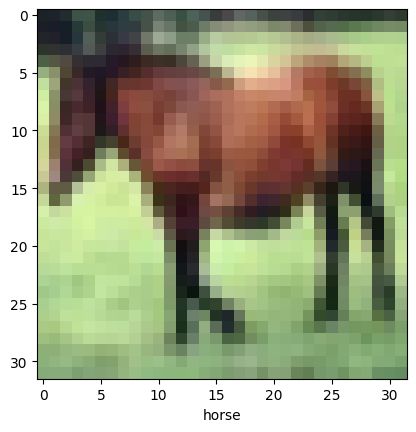

In [13]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [14]:
# 使用 Sequential 顺序模型，一层接一层地堆叠
model = models.Sequential()

# 模块 1: 卷积层和池化层（特征提取部分）
# 第 1 层
# 第一个卷积层，使用 32 个 3x3 的滤波器（kernel）
# 输入形状是 32×32 的彩色图片（3 通道）
# ReLU 激活函数用于增加非线性
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# 第 2 层
# 最大池化层：把图像尺寸从 32×32 缩小为 16×16（减少计算量）
model.add(layers.MaxPooling2D((2, 2)))

# 第 3 层
# 第二个卷积层，使用 64 个 3×3 滤波器（没有指定 input_shape，因为系统会自动推断）
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 第 4 层
model.add(layers.MaxPooling2D((2, 2)))

# 第 5 层
# 第三个卷积层，仍使用 64 个滤波器，提取更高层特征。
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 模块 2: 全连接层（分类部分）
# 第 6 层: Flatten 摊平
# 把前一层输出的 3D 特征图变成 1D 向量，例如 (8, 8, 64) → 4096
model.add(layers.Flatten())

# 第 7 层: 
# 一个隐藏的全连接层（64 个神经元），进一步组合特征
model.add(layers.Dense(64, activation='relu'))

# 模块 3: 输出层
# 10 个神经元，对应 CIFAR-10 的 10 个类别
model.add(layers.Dense(10))
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

2025-06-12 15:31:33.759172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-12 15:31:33.797269: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-12 15:31:33.800151: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
# compile编译
# 优化器 
# Adam 是一种常用的优化器（比传统的SGD更快、更稳）。
# 它会自动调整学习率，适合多数深度学习任务。
# 可以写成 tf.keras.optimizers.Adam(learning_rate=0.001) 进行更细致设置。

# 指标
# 在训练/验证过程中，监控“准确率”这个指标。
# 还有很多指标，如：metrics=['precision', 'recall']（需额外处理标签）
# 或自定义评估函数
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

# 执行训练
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20,
    validation_data=(test_images, test_labels)
    )

2025-06-12 15:31:38.698509: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-06-12 15:31:39.049899: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/20


2025-06-12 15:31:39.846028: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-06-12 15:31:39.915347: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-06-12 15:31:40.239798: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-06-12 15:31:40.301367: I external/local_xla/xla/service/service.cc:168] XLA service 0x7be754334490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-06-12 15:31:40.301385: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-06-12 15:31:40.306974: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749756700.383859 1084759 device_compil

1563/1563 [==============================] - ETA: 0s - loss: 1.5202 - accuracy: 0.4473

2025-06-12 15:31:54.722770: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-06-12 15:31:54.792994: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 16s 9ms/step - loss: 1.5202 - accuracy: 0.4473 - val_loss: 1.3226 - val_accuracy: 0.5256
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1935 - accuracy: 0.5767 - val_loss: 1.1153 - val_accuracy: 0.5965
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0483 - accuracy: 0.6303 - val_loss: 1.0439 - val_accuracy: 0.6303
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9617 - accuracy: 0.6617 - val_loss: 0.9398 - val_accuracy: 0.6717
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8871 - accuracy: 0.6879 - val_loss: 1.0007 - val_accuracy: 0.6595
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8334 - accuracy: 0.7055 - val_loss: 0.8846 - val_accuracy: 0.6924
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7768 - accuracy: 0.7259 - val_loss: 0.9131 - val_accuracy: 0.68

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

2025-06-12 15:38:15.449905: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - loss: 1.0850 - accuracy: 0.6944 - 571ms/epoch - 2ms/step
0.6944000124931335


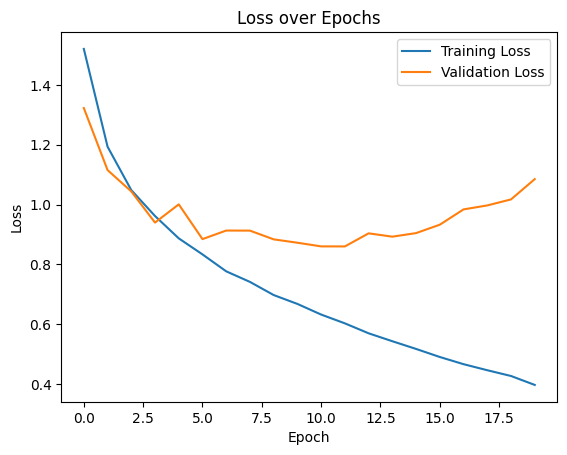

In [17]:
import matplotlib.pyplot as plt

# 1️⃣ 损失曲线（Loss Curve）
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

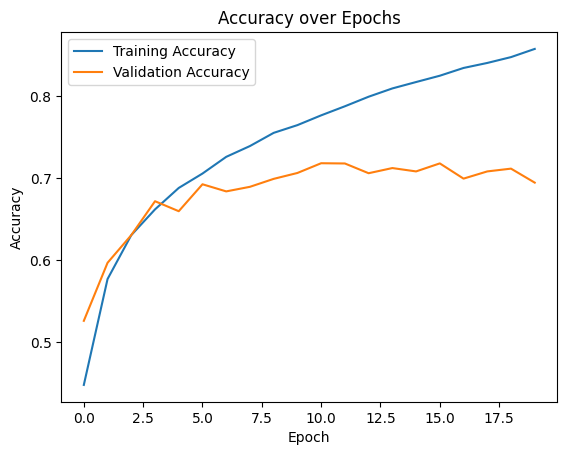

In [18]:
# 2️⃣ 准确率曲线（Accuracy Curve）

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


313/313 [==============================] - 0s 1ms/step


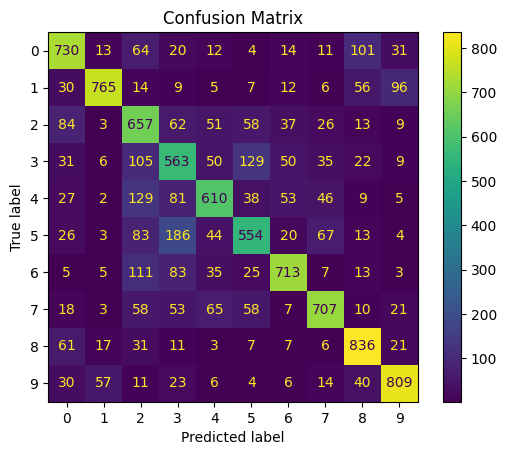

In [19]:
# 混淆矩阵（适用于分类）
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(test_images)
pred_labels = pred.argmax(axis=1)

cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

313/313 [==============================] - 0s 1ms/step


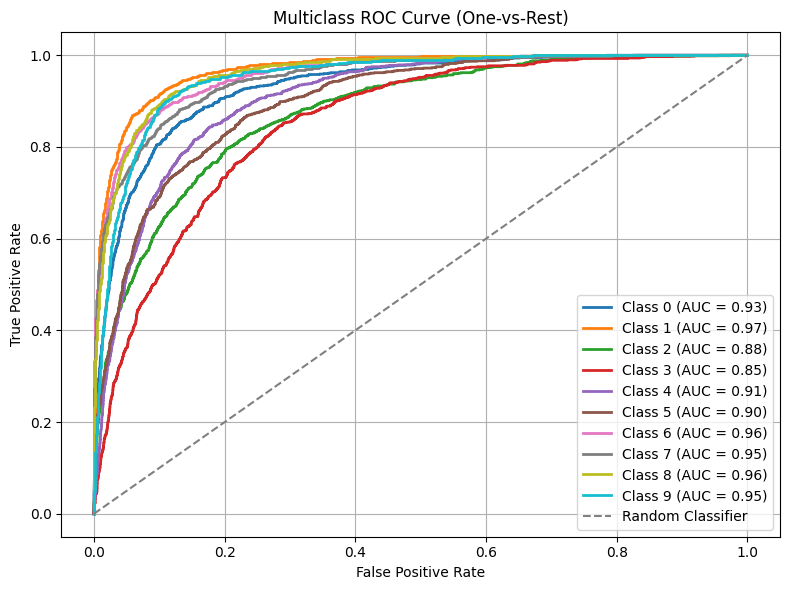

In [21]:
# ROC 曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical

# 假设你已经有：
# model — 已训练模型
# test_images — 测试图像，形状 (10000, 32, 32, 3)
# test_labels — 测试标签，形状 (10000, 1)

# 1. 将标签 one-hot 编码（多分类必须）
n_classes = 10
y_test_bin = label_binarize(test_labels, classes=range(n_classes))

# 2. 获取模型输出概率（softmax），形状 (10000, 10)
y_score = model.predict(test_images)

# 3. 初始化画图
plt.figure(figsize=(8, 6))

# 4. 对每个类别画一条 ROC 曲线
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

# 5. 参考线 & 图设置
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

